# pandasで日付時刻型データを扱う方法を学ぼう

In [1]:
import pandas as pd
# 売上データのcsvファイルの読込み
df_log = pd.read_csv('dataset/product_log.csv', parse_dates=['Date'])
df_log.head()

,Date,Num,Product
0,2017-01-03,1.0,B
1,2017-01-06,2.0,B
2,2017-01-07,1.0,A
3,2017-01-11,2.0,A
4,2017-01-12,2.0,B


pandas.read_csvのparse_datesオプションで日付時刻型として扱う列を指定できる。

In [2]:
# df_logのDate列の要素の型は日付時刻型
df_log.dtypes

Date       datetime64[ns]
Num               float64
Product            object
dtype: object

In [3]:
# 製品マスタのcsvファイルの読込み
df_master = pd.read_csv('dataset/product_master.csv')
df_master

,Price,Product
0,1000,A
1,1200,B


In [4]:
# 売上データと製品マスタから売上金額(Sale)の入った新たな表を作成します
df_sale = pd.merge(df_log, df_master)
df_sale['Sale'] = df_sale.Price * df_sale.Num
df_sale.head()

,Date,Num,Product,Price,Sale
0,2017-01-03,1.0,B,1200,1200.0
1,2017-01-06,2.0,B,1200,2400.0
2,2017-01-12,2.0,B,1200,2400.0
3,2017-01-13,3.0,B,1200,3600.0
4,2017-01-15,2.0,B,1200,2400.0


In [8]:
# df_sale.Dateも日付時刻型
df_sale.dtypes

Date       datetime64[ns]
Num               float64
Product            object
Price               int64
Sale              float64
dtype: object

- 時系列データの読み込みを学ぼう

In [21]:
import pandas as pd
import datetime

# 売上金額データのcsvファイルの読込み
df_sale = pd.read_csv(
    'dataset/product_sale.csv', parse_dates=['Date'], index_col='Date')
# 行ラベルと列の型を確認
print(df_sale.index.name, df_sale.index.dtype)

Date datetime64[ns]


In [22]:
# 別の読込方法（段階的に作成する方法）
df_sale2 = pd.read_csv('dataset/product_sale.csv')
# 読み込んでから、日付時刻型に変更することもできます
df_sale2.Date = df_sale2.Date.apply(pd.to_datetime)

In [23]:
# 後から行ラベルを変更することもできます
df_sale3 = df_sale2.set_index('Date')
# 行ラベルと列の型を確認
print(df_sale3.index.name, df_sale3.index.dtype)

Date datetime64[ns]


- 日付時刻型データの情報

In [15]:
df_sale.head()

,Date,Num,Product,Price,Sale
0,2017-01-03,1.0,B,1200,1200.0
1,2017-01-06,2.0,B,1200,2400.0
2,2017-01-12,2.0,B,1200,2400.0
3,2017-01-13,3.0,B,1200,3600.0
4,2017-01-15,2.0,B,1200,2400.0


In [17]:
df_sale.Date.dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: Date, dtype: int64

In [18]:
# # indexにdateを指定している場合は、以下で取れる
# df_sale.index.month

- 時系列データを処理する

In [24]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# 売上金額データのcsvファイルの読込み
df_sale = pd.read_csv(
    'dataset/product_sale.csv', parse_dates=['Date'], index_col='Date')
df_sale.head()

,Num,Product,Price,Sale
Date,,,,
2017-01-03,1.0,B,1200,1200.0
2017-01-06,2.0,B,1200,2400.0
2017-01-07,1.0,A,1000,1000.0
2017-01-11,2.0,A,1000,2000.0
2017-01-12,2.0,B,1200,2400.0


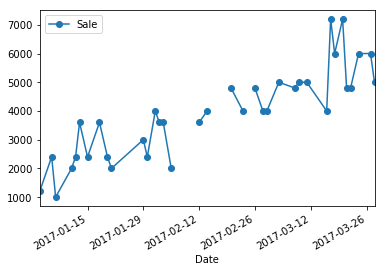

In [25]:
# Seriesのグラフでは、plt.legendで凡例が出ます
df_sale.Sale.plot(marker='o')
plt.legend();

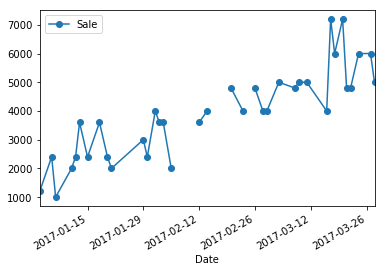

In [26]:
# DataFrameのグラフは、デフォルトで凡例が出ます
df_sale[['Sale']].plot(marker='o');

リサンプリング　＝　時系列データの間隔（1秒や１時間など）を変更すること
→データを小さくする
→別のデータと結合するために整える

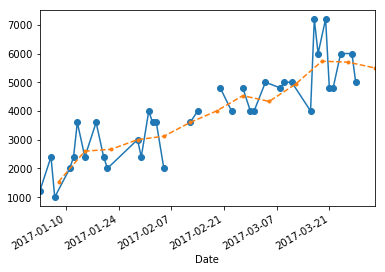

In [27]:
# リサンプリング（粗く）
# nanを含んだmeanなどの演算はnanにならない
df_sale.Sale.plot(marker='o')
df_sale_resample = df_sale.resample('W')
df_sale_resample.mean().Sale.plot(marker='.', style='--');

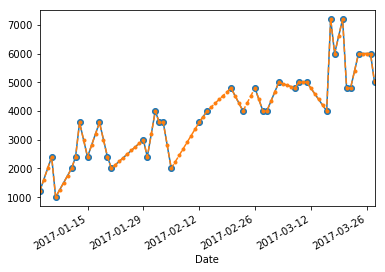

In [28]:
# リサンプリング（細かく）
df_sale.Sale.plot(marker='o')
df_sale.resample('D').interpolate().Sale.plot(marker='.', style='--');

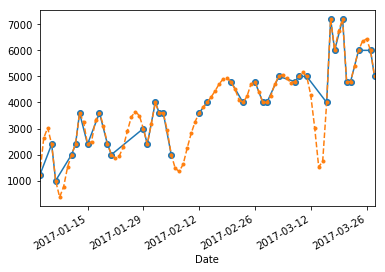

In [29]:
# リサンプリング（細かく滑らかに）
df_sale.Sale.plot(marker='o')
df_sale.resample('D').interpolate('quadratic').Sale.plot(
    marker='.', style='--');